RobustScaler --- 3:58 min
===

* 3:58 min | Última modificación: Octubre 7, 2021 | [YouTube](https://youtu.be/lZ7iMXcQlCM)

Remueve la mediana y escala los datos de acuerdo con el rango intercuartil.

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

data = penguins[["flipper_length_mm"]]
data = data.rename(columns={"flipper_length_mm": "original"})

In [2]:
import numpy as np

rng = np.random.default_rng(2021)
index = np.random.randint(low=0, high=len(data), size=5)
mean = data.original.mean()
std = data.original.std()

data.loc[index, "original"] = np.random.uniform(low=4.0, high=5.0, size=5) * std + mean

In [3]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler(
    with_mean=True,
    with_std=True,
)
standardScaler.fit(data[["original"]])

data["StandardScaler"] = standardScaler.transform(data[["original"]])

In [4]:
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler(
    # -------------------------------------------------------------------------
    # If True, center the data before scaling.
    with_centering=True,
    # -------------------------------------------------------------------------
    # If True, scale the data to interquartile range.
    with_scaling=True,
    # -------------------------------------------------------------------------
    # Quantile range used to calculate scale_.
    quantile_range=(0.25, 0.75),
)
robustScaler.fit(data[["original"]])

data["RobustScaler"] = robustScaler.transform(data[["original"]])

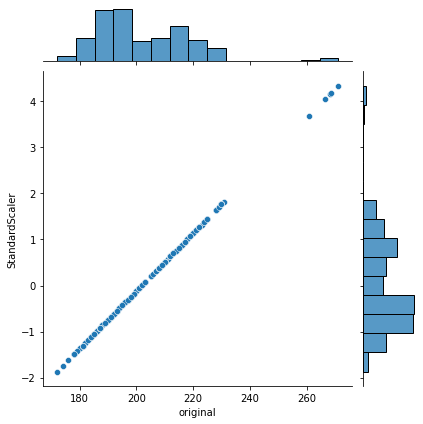

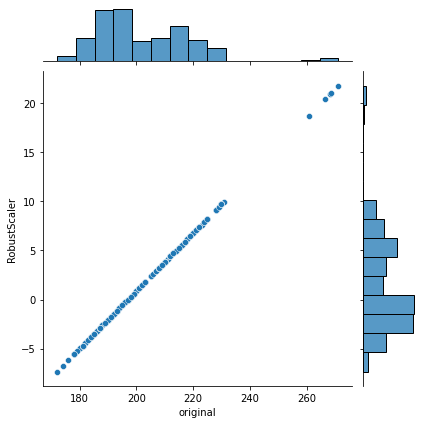

In [5]:
import matplotlib.pyplot as plt

sns.jointplot(x="original", y="StandardScaler", data=data, kind="scatter")

sns.jointplot(x="original", y="RobustScaler", data=data, kind="scatter")
plt.show()

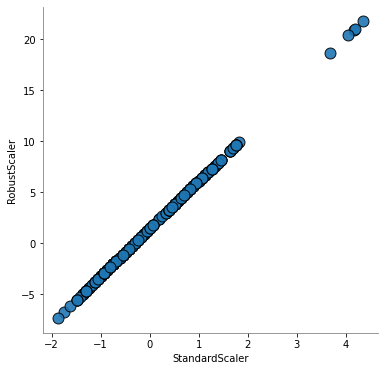

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(
    data.StandardScaler,
    data.RobustScaler,
    color="tab:blue",
    edgecolors="k",
    s=120,
    alpha=0.9,
)
plt.xlabel("StandardScaler")
plt.ylabel("RobustScaler")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

In [6]:
display(
    robustScaler.center_,
    robustScaler.scale_,
)

array([197.])

array([3.41])

In [7]:
display(
    standardScaler.mean_,
    standardScaler.scale_,
)

array([201.85840955])

array([15.97429138])